<a href="https://colab.research.google.com/github/erinmichno/FridayDirectX/blob/master/LearningPotentialsGraphUPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPDATED Understanding relationship of the gradient and context between R and cartesian x,y,z**


Reworking potentials:

from [classical mechanics wiki](https://en.wikipedia.org/wiki/Gravitational_field#Classical_mechanics) we are given the equation:

$$
g = \frac{F}{m} = \frac{d^2R}{dt^2} = -GM\frac{R}{|R|^3} = -∇Φ
$$

based on Newton's law of universal graviation  $F = G\frac{Mm}{r^2}$  since $g = \frac{F}{m}$ we cancel the ${m}$ and see the scalar magnitude of the acceleration due to gravity is
$$
|g| = GM\frac{1}{|R|^2}
$$
and that the 3D vector direction of this magnitude will be toward from the particle acting on our particle is
$$
-\frac{R}{|R|}
$$
where big $R$ is our particle 3D position vector $\begin{pmatrix}x,y,z\end{pmatrix}$ if the other particle is at the origin  and $r$  or $|R|$ is the magnitude of the distance $r = (x^2 + y^2 + z^2)^{1/2}$ (- bc getting pulled into origin not away)

We can come to the same conclusion if we define the potential $Φ$ at a distance $r$ from a point mass $M$ as the work $W$ that needs to be done by an "external agent" from infinity to that point. See reference:  [gravitational potential wiki](https://en.wikipedia.org/wiki/Gravitational_potential#Mathematical_form)
$$
Φ(R) = \frac{W}{m} = \frac{1}{m}\int\limits_∞^rF\cdot dR = \frac{1}{m}\int\limits_∞^r \frac{GmM}{r^2}dr = - \frac{GM}{r}
$$

In code the $G$ factor becomes a scaling constant and in the first instance we will treat masses a 1 (will come back later) so we can focus on

Gravitational potential is **proportional** to:
$$
\Phi(x,y,z) = \frac{-1}{r}
$$
and given the gravitational force can be calculated from the potential as the negative of the gradient resulting in
$$
F = - \nabla\Phi(x,y,z)
$$

where r is the radius or distance from a particle at the origin and the current particle at x,y,z
$$
r = (x^2 + y^2 + z^2)^{1/2}
$$

So if I do some basic calc:

$$
\frac{d\Phi}{dr} = -1*-1 * r^{-1 -1} = \frac{1}{r^2}
$$

which gives us the proportional relationship of acceleration $|g|$ above. Yay.

Now given our definition of $r = (x^2 + y^2 + z^2)^{1/2}$ it makes sense that the grad of r would be ${\nabla}r = \begin{pmatrix}\frac{x}{r},&\frac{y}{r},&\frac{z}{r}\end{pmatrix}$ as its the direction of the slope of the field


Here is the work for grad of r but this is just understanding some intuition
$$
\frac{\partial }{\partial \:x}\left(\left(x^2+y^2+z^2\right)^{\frac{1}{2}}\right) = \frac{x}{\left(x^2+y^2+z^2\right)^{\frac{1}{2}}} = \frac{x}{r}
$$
$$
\frac{\partial }{\partial \:y}\left(\left(x^2+y^2+z^2\right)^{\frac{1}{2}}\right) = \frac{y}{\left(x^2+y^2+z^2\right)^{\frac{1}{2}}} = \frac{y}{r}
$$
$$
\frac{\partial }{\partial \:z}\left(\left(x^2+y^2+z^2\right)^{\frac{1}{2}}\right) = \frac{z}{\left(x^2+y^2+z^2\right)^{\frac{1}{2}}} = \frac{z}{r}
$$

Now that I've played around with some gravitational potentials and have some intuition about potentials and grads lets get back to our equation:



$$
V(r) = \left(\mu_{\rm{0}}e^{2\rho (1-\frac{r^2}{\xi^2})}-2\mu_{\rm{0}}e^{\rho(1-\frac{r^2}{\xi^2})}\right)
$$
note $\xi$ and $r_{\rm{eq}}$ are interchangable they both represent the equilibrium radius newman's paper uses $\xi$ and the code uses $r_{\rm{eq}}$

so if we start with a simple case ( a single particle acting on us) and go back to the
given equation 4 in newman's book chapter (excluding the noise)
$$ \dot{y} = -\nabla V(r)$$
putting some stuff into symbolab or wolframalpha (both agree)
$$
\frac{dV}{dr} = \frac{\partial \:}{\partial \:r}\left(\mu_{\rm{0}}e^{2\rho (1-\frac{r^2}{\xi^2})}-2\mu_{\rm{0}}e^{\rho(1-\frac{r^2}{\xi^2})}\right)
$$
$$
\frac{dV}{dr} =\frac{-4\mu_{\rm{0}}\rho r e^{2\rho (1-\frac{r^2}{\xi^2})}}{\xi^2} + \frac{4\mu_{\rm{0}}\rho r e^{\rho (1-\frac{r^2}{\xi^2})}}{\xi^2}
$$
Then if we wanted to store with the ($\frac{1}{r})(\frac{dV}{dr})$ we could just remove the $r$ from both fractions resulting in
$$
\frac{1}{r}\frac{dV}{dr} =\frac{-4\mu_{\rm{0}}\rho e^{2\rho (1-\frac{r^2}{\xi^2})}}{\xi^2} + \frac{4\mu_{\rm{0}}\rho e^{\rho (1-\frac{r^2}{\xi^2})}}{\xi^2}
$$

We could then create some code in C++ (single threaded for ease of reading rn) in bins or at runtime with this 1/r dV/dr  and apply it to the x,y,z segment of particle_b.position - particle_a.position

This makes a lot of sense as in my graphics brain as many vectors are directional only such as surface normals or light directions  so the x,y,z are normalized (1/r) when working with many of these vectors it is implied $\begin{pmatrix}\frac{x}{r},&\frac{y}{r},&\frac{z}{r}\end{pmatrix} $ or that r = 1

In [ ]:

import sympy as sym  # Assuming 'sym' refers to the symbolic math library
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sympy.utilities.lambdify import lambdify, implemented_function

# Define constants symbolically
pi = sym.pi
ot = 1.0 / 3.0
p3 = pi.evalf() / 3.0 / sym.sqrt(2.0)

# Define other constants with numerical values
ne_cell = 128
n_bins = 1024
r_cell = 10.0  # microns
frac_interaction_max = 1.8
epsilon = 0.01
elastic_mod_cell = 1.0  # kiloPascals

# Calculate derived values
r_equil = 2.0 * r_cell * (p3 / ne_cell) ** ot  # microns
r_equil_sq = r_equil*r_equil
r_interaction_max = frac_interaction_max * r_equil  # microns
d_r_sq = r_interaction_max**2 / n_bins
d_r_sq_recip = 1.0 / d_r_sq

# Calculate remaining values
rho = -1.0 * sym.log(1.0 - sym.sqrt(1.0 - epsilon)) / (frac_interaction_max**2 - 1.0)
kappa_cell = elastic_mod_cell * r_cell  # nanoNewtons/micron
kappa_element = kappa_cell / (ne_cell + 0.0) ** ot
pot_min = (kappa_element / 8) * (r_equil / rho) ** 2
force_amplitude = 4.0 * pot_min * rho / r_equil_sq  #non r component of differential

print("Equilibrium distance:", r_equil, "microns")
print("Maximum interaction range:", r_interaction_max, "microns")
print("Potential minimum:", pot_min)
print("Force amplitude:", force_amplitude)
print("Rho", rho)
print("d_r_sq", d_r_sq)

Equilibrium distance: 3.59030391371453 microns
Maximum interaction range: 6.46254704468616 microns
Potential minimum: 0.572006150765727
Force amplitude: 0.419645406008547
Rho 2.36419997282162
d_r_sq 0.0407856585007635


In [ ]:
r_sq_table = np.arange(0,n_bins*d_r_sq,d_r_sq)
pot_deriv_table = []


for j in range(0,n_bins):
    myfactor  = sym.exp(rho*(1.0-r_sq_table[j]/r_equil_sq))
    pot_deriv_table.append(force_amplitude * myfactor * (-myfactor + 1.0))



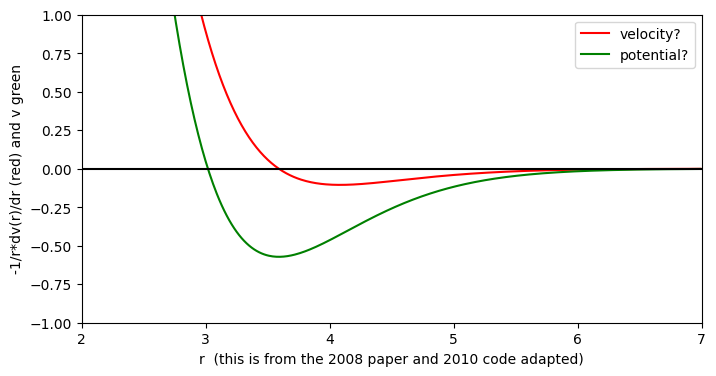

In [ ]:

r = sym.Symbol('r',real=True)
#now now force_amplitude is the 4*Uo*rho/r_eq^2  which is the constant prefix of the dV/dr
#pot_min is Uo as far as I can tell   so if they are already calculating the analytical dV/dr  then why why why do they do the forward difference and weird quotient rule?
dv = force_amplitude*sym.exp(2.0 * rho * (1.0- (r*r/r_equil_sq))) - force_amplitude * sym.exp(rho * (1.0- (r*r/r_equil_sq))) #note this is -1/r*dv/dr  if it was dv/dr on it's own would be -force_amp*r*(stuff) - force_amp*r*stuff
v = pot_min*sym.exp(2*rho*(1 - (r*r/r_equil_sq)))-2*pot_min*sym.exp(rho * (1.0- (r*r/r_equil_sq)))
Vr2 = lambdify(r, dv,'numpy')
Vr3 = lambdify(r, v,'numpy')
xvals = np.arange(0.0,7,.01)
yvals = Vr2(xvals)
yvals2 = Vr3(xvals)
fig2 = plt.figure(figsize=(8,4))
plt.plot(xvals,yvals,'r',label='velocity?')
plt.plot(xvals,yvals2,'g',label='potential?')
plt.axhline(0, color='black')
plt.ylim([-1, 1])
plt.xlim([2.0, 7])
plt.xlabel("r  (this is from the 2008 paper and 2010 code adapted)")
plt.ylabel("-1/r*dv(r)/dr (red) and v green")
plt.legend(loc='best')
plt.show()

the curve looks ok?

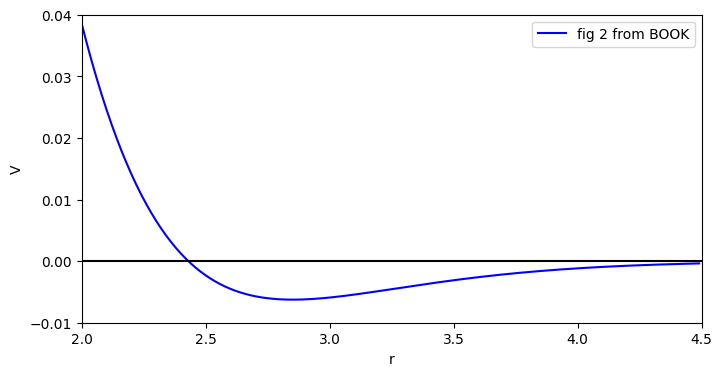

In [ ]:
book_v = 1.1*sym.exp(-r*r/(1.21*1.21)) - 0.1*sym.exp(-r*r/(1.9*1.9))
Vr4 = lambdify(r, book_v, 'numpy')
xprimeVals = np.arange(2.0,4.5,.01)
yvals3 = Vr4(xprimeVals)
fig3 = plt.figure(figsize=(8,4))
plt.plot(xprimeVals,yvals3,'b',label='fig 2 from BOOK')

plt.axhline(0, color='black')
plt.ylim([-0.01, 0.04])
plt.xlim([2, 4.5])
plt.xlabel("r")
plt.ylabel("V")
plt.legend(loc='best')
plt.show()

So the equilibrium point is set at 2.85 microns in the book and 3.59 microns in the later paper and in the code - does this make a difference?

Also the scales are drastically difference between the different versions... does it matter?

In [ ]:
import random
import sympy as sym  # Assuming 'sym' refers to the symbolic math library
import numpy as np

gaussRand = np.array([0.1,0.1,0.2])
randomVals = np.random.rand(4) #[0 to 1)
amp = sym.sqrt(-2.0*sym.log(randomVals[0]))
arg = 2*sym.pi*randomVals[1]
gaussRand[0] = amp*sym.cos(arg)
gaussRand[1] = amp*sym.sin(arg)
amp = sym.sqrt(-2.0*sym.log(randomVals[2]))
arg = 2*sym.pi*randomVals[3]
gaussRand[2] = amp*sym.cos(arg)
print("random gauss", gaussRand)
print("vals", randomVals)

random [-1.29090135  1.3811906   2.06170172]
vals [0.16745228 0.36962424 0.11611167 0.01815475]


So some other values that are useful in the newman code is the "rel_strength" variable that is a complex 5D array - however only two values matter intracellular interactions get a 1.0 strength and intercellular interactions get a 0.5 multiplier to the integration step as the factor of intercells is "less than" intra

fadein_amp is another scaling factor based on each element strength which is a linear measure of age/establishment_age    establishment_age is just a 1/rate of new element

In [ ]:
# growth parameters
cell_cycle_time=0.5*3600.0 # cell cycle time in seconds
frac_growth=0.9 #fraction of current cell radius within which new elements may be placed
frac_placement_min=0.6 # minimum separation of new element from nearest neighbour, as fraction of r_equil
# derived quantities
ne_cell = 256
rate_new_element=ne_cell/cell_cycle_time # rate per cell at which new elements introduced
establishment_time=1.0/rate_new_element # transient time for each new element to become established ("faded in")
# note: may need better derivation for this time and relationship to cell_cycle_time
r_placement_min_sq=(frac_placement_min*3.59030391371453)**2 # squared minimum distance from new element to nearest neighbour
print("establishment_time", establishment_time)

establishment_time 7.03125
